## 1. Introduction

Lending Club은 P2P 대출 서비스입니다. Lending Club에서 돈을 빌리는 사람들은 높은 신용점수를 가질 수록, 이자율이 낮습니다. 반면, 신용점수가 낮은 사람들은 이자율이 높습니다.

투자가 입장에서는 신용점수가 낮은 사람들에게 돈을 빌려주면 ROI(Return On Investment)가 높아서 좋지만, 자칫 잘못하면 파산해버려서 돈을 전혀 못받을 수도 있습니다.

따라서, 머신러닝 모델을 통해서 높은 이자율은 유지하면서도 파산하지 않을 것 같은 사람을 찾고자 합니다. 즉 높은 ROI와 낮은 risk를 가지는 모델을 만들고자 합니다.

Source : https://www.kaggle.com/datasets/jeandedieunyandwi/lending-club-dataset

In [ ]:
# 데이터 분석 필수 라이브러리 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 세팅
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')

In [ ]:
# 데이터를 불러오기 위한 세팅
base_path = "./data/Lending Club Loan Prediction/"
data = pd.read_csv(base_path + "lending_club_loan_two.csv")
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
# 통계량 확인
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## 1. Exploratory Data Analysis

In [ ]:
# EDA에서 필수로 수행해야 하는 것 2가지.
# 1) 결측치를 찾아서 모두 처리한다.
# 2) dtype이 object인 모든 column을 int 또는 float로 변환한다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### 1) `loan_status`

In [ ]:
# class imbalance problem (9:1 이상 + 한쪽 class 개수가 너무 적은 겨우 (under 1000))
# keep.
data.loan_status.value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


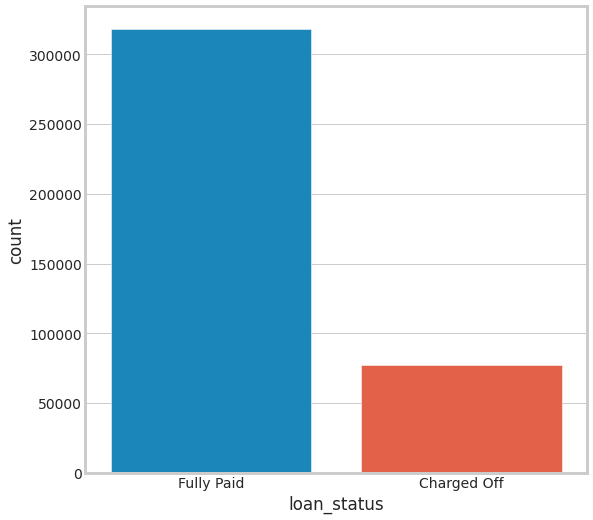

In [ ]:
# target variable 확인
plt.figure(figsize=(8, 8))
sns.countplot(data.loan_status)
plt.show()

In [ ]:
# # loan_status == "Fully Paid" -> 1
# # loan_status == "Charged Off" -> 0
# #data.loc[data.loan_status == "Fully Paid", "loan_status"] = 1
# #data.loc[data.loan_status == "Charged Off", "loan_status"] = 0

# target = []
# for status in data.loan_status:
#     if status == "Fully Paid":
#         target.append(1)
#     else:
#         target.append(0)

# data["target"] = target

In [ ]:
#data.loan_status.astype  # type 변경이 왜 안되는지?
#data.loan_status.value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

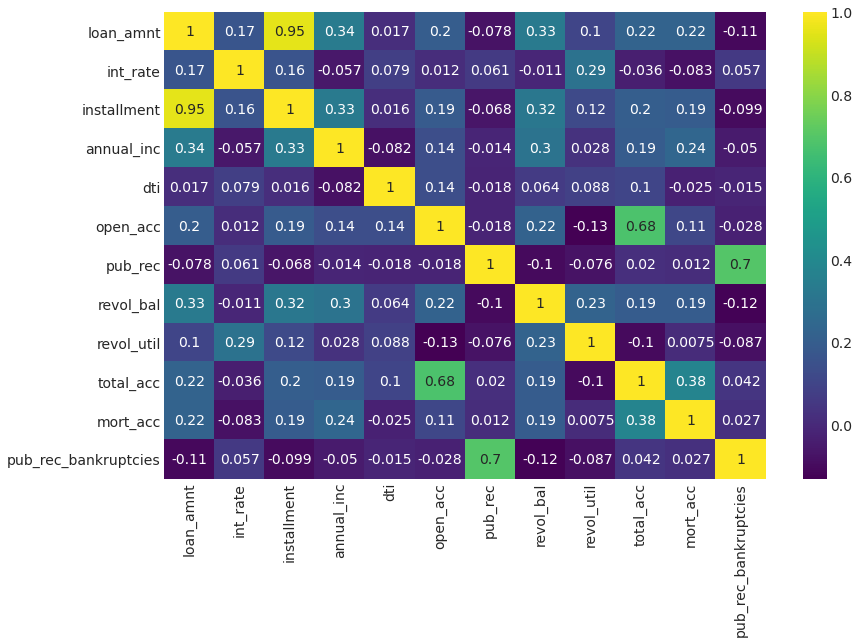

In [ ]:
# 상관관계 확인을 위한 feature correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="viridis")
plt.show()

### 2) `loan_amnt` & `installment`

Text(0.5, 0, 'loan_amnt')

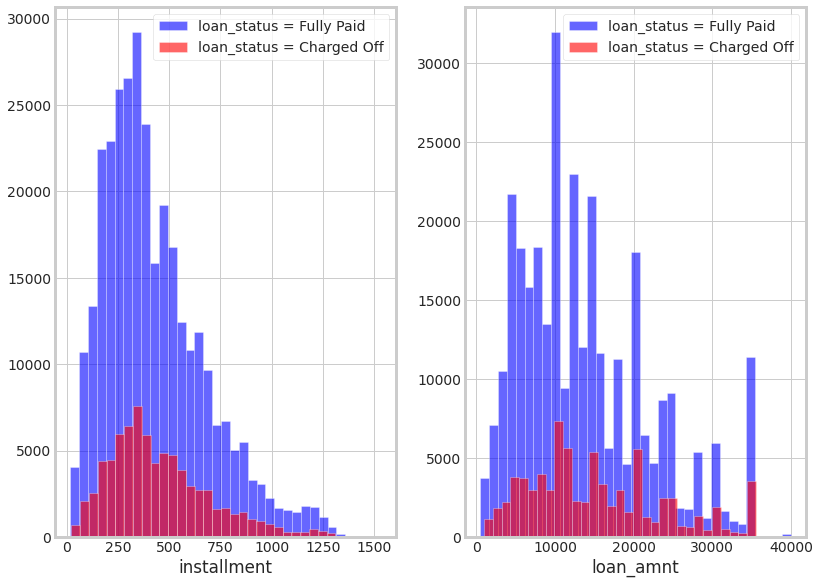

In [ ]:
plt.figure(figsize=(12, 20))

plt.subplot(2, 2, 1)
data[data["loan_status"] == "Fully Paid"]["installment"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["installment"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("installment")

plt.subplot(2, 2, 2)
data[data["loan_status"] == "Fully Paid"]["loan_amnt"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["loan_amnt"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("loan_amnt")

### 3) `grade` & `sub_grade`

In [ ]:
# grade와 sub_grade에 어떤 값들이 있는지 확인
#data.grade.value_counts()
#data.grade.unique()
#data.sub_grade.value_counts()
print(sorted(data.sub_grade.unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


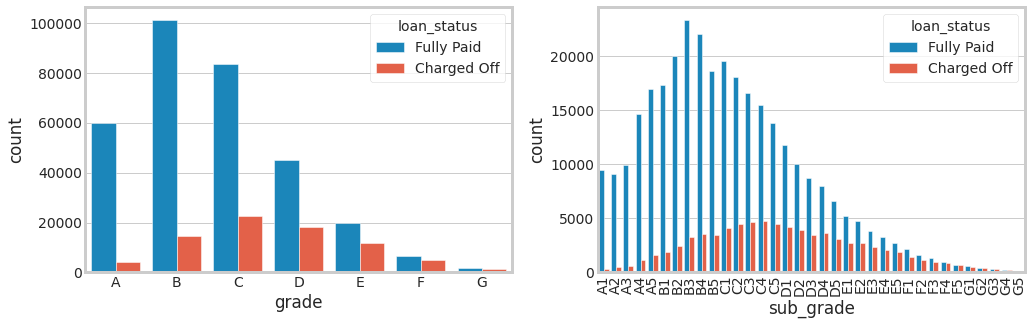

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

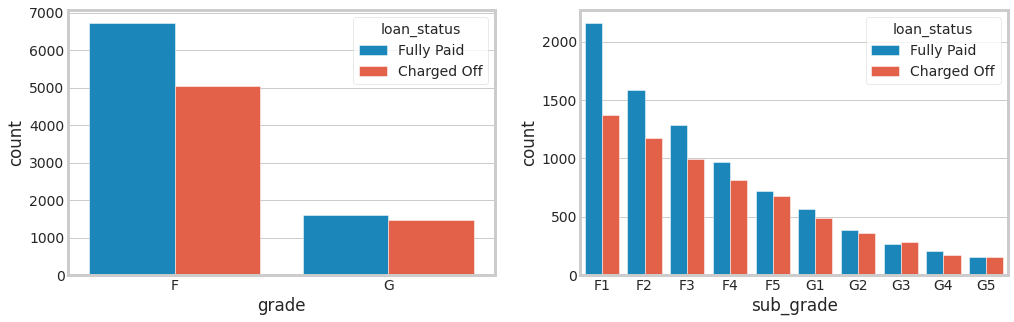

In [ ]:
# grade가 낮은 데이터들 체크
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

### 4) `term`, `home_ownership`, `verification_status` & `purpose`

In [ ]:
# home_ownership 확인
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
# NONE, ANY 처리 --> OTHER로 변경!
data.loc[(data.home_ownership == "NONE") | (data.home_ownership == "ANY"), "home_ownership"] = "OTHER"
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

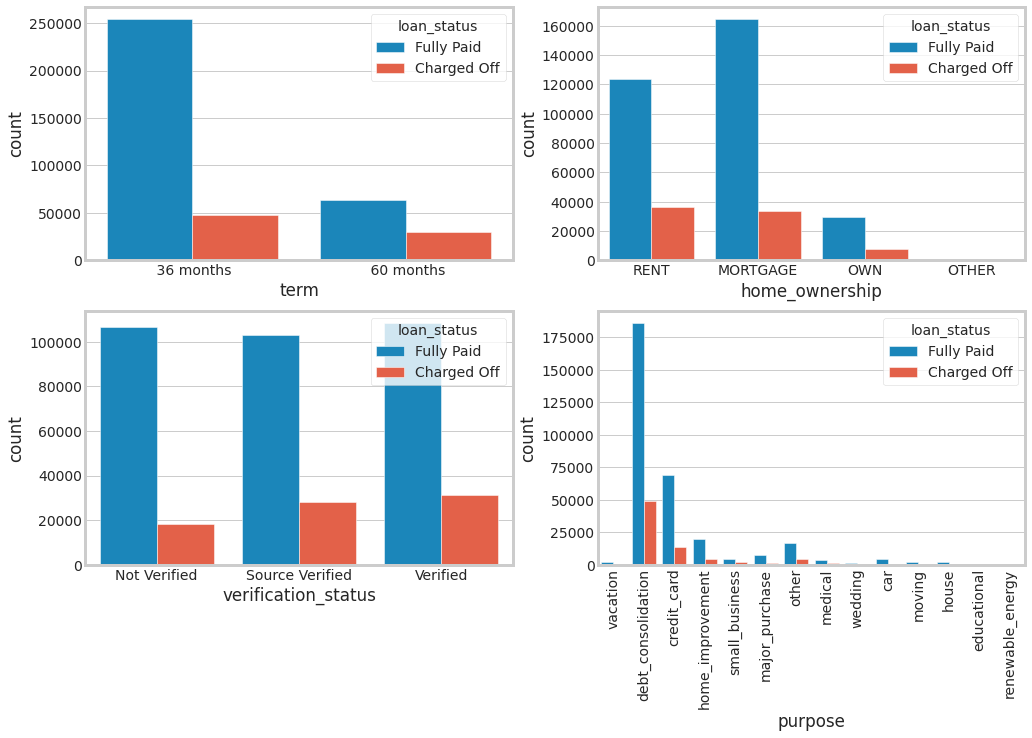

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### 5) `int_rate` & `annual_inc`

Text(0.5, 0, 'annual_inc')

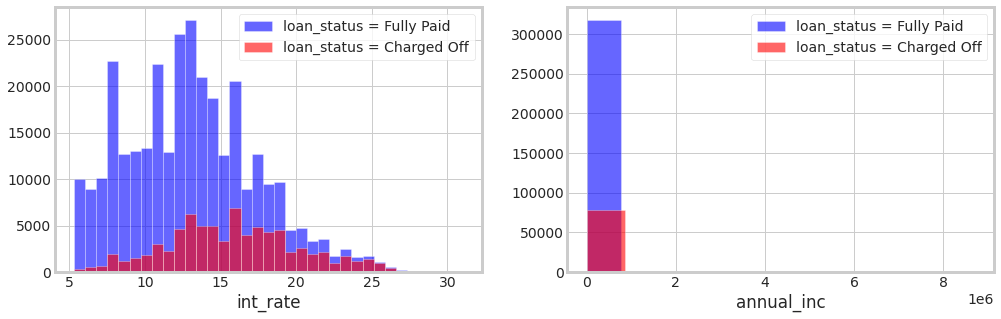

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
data[data["loan_status"] == "Fully Paid"]["int_rate"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["int_rate"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("int_rate")

plt.subplot(2, 2, 2)
data[data["loan_status"] == "Fully Paid"]["annual_inc"].hist(bins=10, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["annual_inc"].hist(bins=10, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("annual_inc")

In [ ]:
# annual_inc이 많이 높은 사람이 있는 것 같으니, 확인
data.loc[data.annual_inc >= 1000000, "loan_status"].value_counts()
#data.loc[data.annual_inc >= 1000000, "loan_amnt"].value_counts()

Fully Paid     65
Charged Off    10
Name: loan_status, dtype: int64

- It seems that loans with high intersest rate are more likely to be unpaid.
- Only 75 borrowers have an annual income more than 1 million.

### 6) `emp_title` & `emp_length`

In [ ]:
data[["emp_title", "emp_length"]]

,emp_title,emp_length
0,Marketing,10+ years
1,Credit analyst,4 years
2,Statistician,< 1 year
3,Client Advocate,6 years
4,Destiny Management Inc.,9 years
...,...,...
396025,licensed bankere,2 years
396026,Agent,5 years
396027,City Carrier,10+ years
396028,"Gracon Services, Inc",10+ years


In [ ]:
# emp_title, emp_length 확인
#data.emp_title.isna().sum() # 비어있는 개수 출력.
#data.emp_length.isna().sum()
#data[data.isna().any(axis=1)] # boolean mask
#data[data.isna().any(axis=1)]
data.loc[data.isna().any(axis=1), ["loan_amnt", "emp_title", "emp_length"]]

# emp_title, emp_length가 NaN인 데이터들의 loan_status를 출력해보세요.
#data.loc[data.isna().any(axis=1), ["loan_status", "emp_title", "emp_length"]]
# 1) emp_title, emp_length만 들고옵니다.
emp = data[["emp_title", "emp_length"]]
# 2) emp_title과 emp_length가 비어있는 row들을 찾아서, 해당 row의 loan_status를 불러옵니다.
data.loc[emp.isna().any(axis=1), "loan_status"].value_counts()

Fully Paid     17109
Charged Off     5996
Name: loan_status, dtype: int64

In [ ]:
# 대소문자 통일
#data.emp_title.value_counts()
#data.emp_title.unique()[:100]
data.emp_title = data.emp_title.str.lower()

In [ ]:
data.emp_title.value_counts()

manager                        5637
teacher                        5430
registered nurse               2627
supervisor                     2591
sales                          2382
                               ... 
crew lead 1                       1
oklahoma aztec co                 1
sr. systems admin/developer       1
truss esimator                    1
senior claims rep                 1
Name: emp_title, Length: 154014, dtype: int64

In [ ]:
# 너무 다양한 Employee title이 있어 대표적인 직군들로 통일시킵니다. (Canonical Form)

def is_manager(title):
    if type(title) is str: # 결측치가 있으면 str check가 안되므로 추가!
        if "manager" in title:
            return "manager"
        else:
            return title

def is_president(title):
    if type(title) is str:
        if "president" in title:
            return "president"
        else:
            return title
    
def is_nurse(title):
    if type(title) is str:
        if "nurse" in title:
            return "nurse"
        else:
            return title

        
def is_driver(title):
    if type(title) is str:
        if "driver" in title:
            return "driver"
        else:
            return title


def is_assistant(title):
    if type(title) is str:
        if "assistant" in title:
            return "assistant"
        else:
            return title


def is_engineer(title):
    if type(title) is str:
        if "engineer" in title:
            return "engineer"
        else:
            return title


functions = [is_manager, is_president, is_nurse, is_driver, is_assistant, is_engineer]
for function in functions:
    data.emp_title = data.emp_title.apply(function)

In [ ]:
# 변경된 emp_title 체크
data.emp_title.value_counts()[:10]

manager       39831
engineer       8603
assistant      7548
driver         5743
teacher        5430
nurse          5146
president      3276
supervisor     2591
sales          2382
owner          2201
Name: emp_title, dtype: int64

Text(0.5, 1.0, 'The most 30 jobs title afforded a loan')

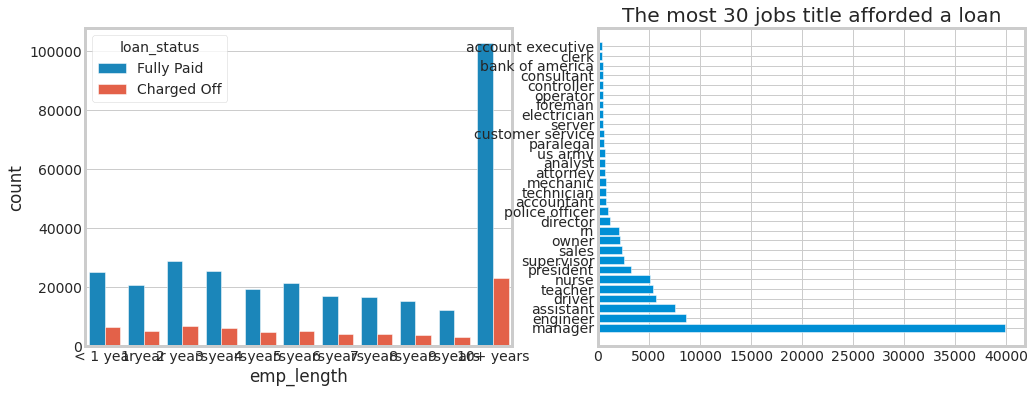

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")

### 7) `issue_d`, `earliest_cr_line`

In [ ]:
#data.issue_d.sort_values().drop_duplicates()[:50]
data.issue_d = pd.to_datetime(data.issue_d) # "Apr-2009" -> 2009-04-01
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line) # "Feb-1959" -> 1959-02-01

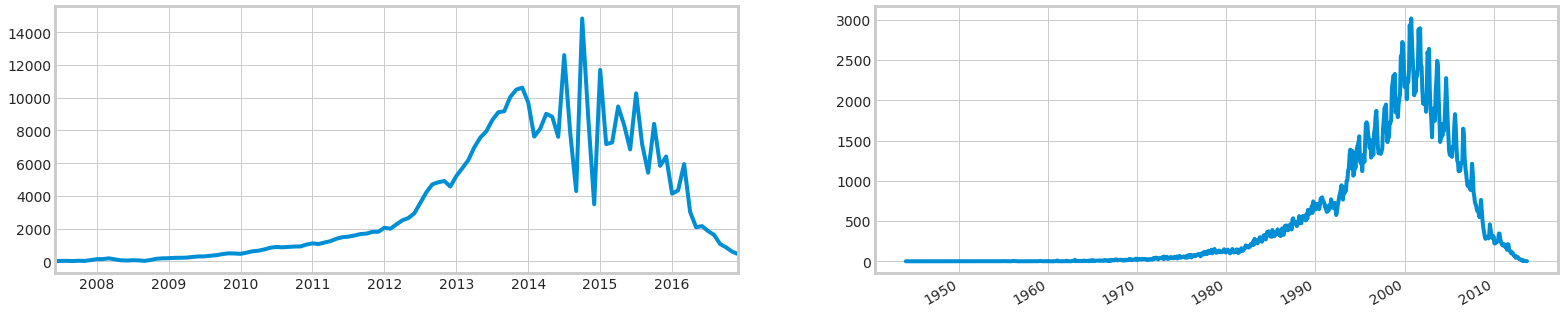

In [ ]:
plt.figure(figsize=(24, 12))

plt.subplot(2, 2, 1)
data.issue_d.value_counts().sort_index().plot()
# 시간대별 loan_status의 변화 그려보기 (*)

plt.subplot(2, 2, 2)
data.earliest_cr_line.value_counts().sort_index().plot()

### 8) `title`

In [ ]:
# title 확인
data.title.value_counts()

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
                            ...  
Craving Organization            1
Final DC Loan                   1
Pay down Debt                   1
Taxes/restructure loans         1
Pay Off Higher APR              1
Name: title, Length: 48817, dtype: int64

In [ ]:
# 대소문자 통일
data['title'] = data.title.str.lower()

In [ ]:
# title 다시 확인
data.title.value_counts() # "debt" -> "debt consolidation" / "consolidate" -> "debt consolidation"

debt consolidation              168108
credit card refinancing          51781
home improvement                 17117
other                            12993
consolidation                     5583
                                 ...  
save                                 1
medical/vacation                     1
my three sons                        1
consolidation to one note            1
first step towards debt free         1
Name: title, Length: 41327, dtype: int64

### 9) `dti`, `open_acc`, `revol_bal`, `revol_util`, & `total_acc`

In [ ]:
# dti 확인
data.dti.value_counts()

0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
46.51      1
43.24      1
46.77      1
92.13      1
40.14      1
Name: dti, Length: 4262, dtype: int64

In [ ]:
# open_acc 중에 특이한 데이터 체크
#data.open_acc.value_counts()
data.loc[data.open_acc > 40, "loan_status"].value_counts()

Fully Paid     155
Charged Off     62
Name: loan_status, dtype: int64

In [ ]:
# total_acc 중에 특이한 데이터 체크
#data.total_acc.value_counts()
data[data.total_acc > 80].shape

(266, 27)

In [ ]:
# revol_bal 중에 특이한 데이터 체크
#data.revol_bal.value_counts()
data[data.revol_bal > 100000].shape

(2958, 27)

In [ ]:
# revol_util 중에 특이한 데이터 체크
#data.revol_util.value_counts()
data[data.revol_util > 100].shape

(1167, 27)

Text(0.5, 0, 'total_acc')

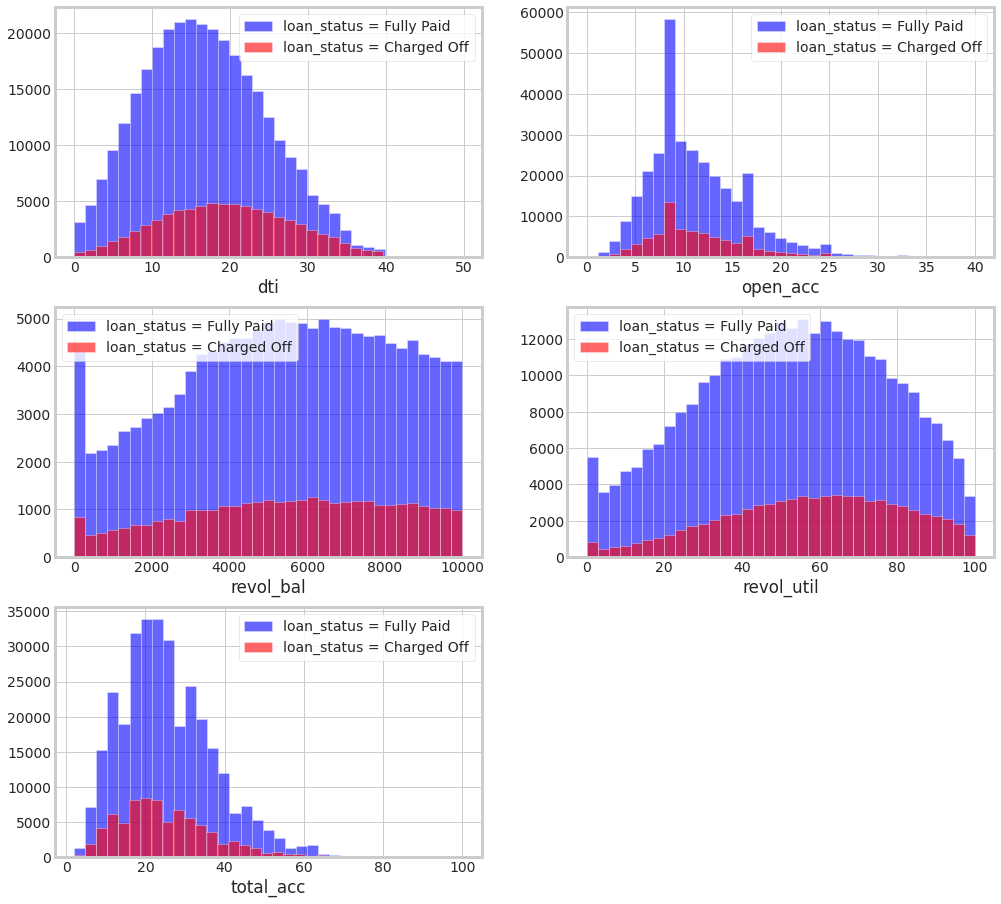

In [ ]:
plt.figure(figsize=(15, 30))

plt.subplot(6, 2, 1)
df = data[(data.dti <= 50.0)]
df[df["loan_status"] == "Fully Paid"]["dti"].hist(bins=35, color='blue', 
                                                                     label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["dti"].hist(bins=35, color='red', 
                                                                      label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("dti")

plt.subplot(6, 2, 2)
df = data[data.open_acc <= 40]
df[df["loan_status"] == "Fully Paid"]["open_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["open_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("open_acc")

plt.subplot(6, 2, 3)
df = data[(data.revol_bal <= 10000)] # revol_bal가 $10000 이하인 데이터만 출력.
df[df["loan_status"] == "Fully Paid"]["revol_bal"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["revol_bal"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_bal")

plt.subplot(6, 2, 4)
df = data[data.revol_util <= 100]
df[df["loan_status"] == "Fully Paid"]["revol_util"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["revol_util"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_util")

plt.subplot(6, 2, 5)
df = data[(data.total_acc) <= 100]
df[df["loan_status"] == "Fully Paid"]["total_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["total_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("total_acc")


### 10) `pub_rec`, `initial_list_status`, `application_type`, `mort_acc`, & `pub_rec_bankruptcies`

In [ ]:
# pub_rec 체크
#data.pub_rec.value_counts()
data.loc[(data.pub_rec >= 1), "loan_status"].value_counts()

Fully Paid     45424
Charged Off    12334
Name: loan_status, dtype: int64

In [ ]:
# initial_list 체크
#data.initial_list_status.value_counts()
data[["initial_list_status", "loan_status"]].value_counts(normalize=True)

initial_list_status  loan_status
f                    Fully Paid     0.485077
w                    Fully Paid     0.318794
f                    Charged Off    0.116054
w                    Charged Off    0.080075
dtype: float64

In [ ]:
# application_type 체크
data.application_type.value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [ ]:
# mort_acc 체크
data.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
# rec_bankruptcies 체크
#data.pub_rec_bankruptcies.value_counts()
data.loc[data.pub_rec_bankruptcies >= 6, "loan_status"].value_counts(normalize=True)

Fully Paid     0.692308
Charged Off    0.307692
Name: loan_status, dtype: float64

In [ ]:
# pub_rec, mort_acc, pub_rec_bankruptcies 데이터 정제
# numeric to boolean

def pub_rec(number): # 전과가 있다/없다 정보로 변환.
    if number >= 1:
        return 1
    else:
        return 0

def mort_acc(number): # mort_acc가 7개 이상이면 문제가 있다(정보가 차이가 있다)
    if number > 7:
        return 1
    else:
        return 0

def pub_rec_bankruptcies(number): # 파산 횟수가 6번 이상이면 문제가 있다(정보가 차이가 있다)
    if number >= 6:
        return 1
    else:
        return 0

In [ ]:
# 함수 적용
#functions = [pub_rec, mort_acc, pub_rec_bankruptcies]
#for function in functions:
#    data[str(function)] = data[str(function)].apply(function)
data.pub_rec = data.pub_rec.apply(pub_rec)
data.mort_acc = data.mort_acc.apply(mort_acc)
data.pub_rec_bankruptcies = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

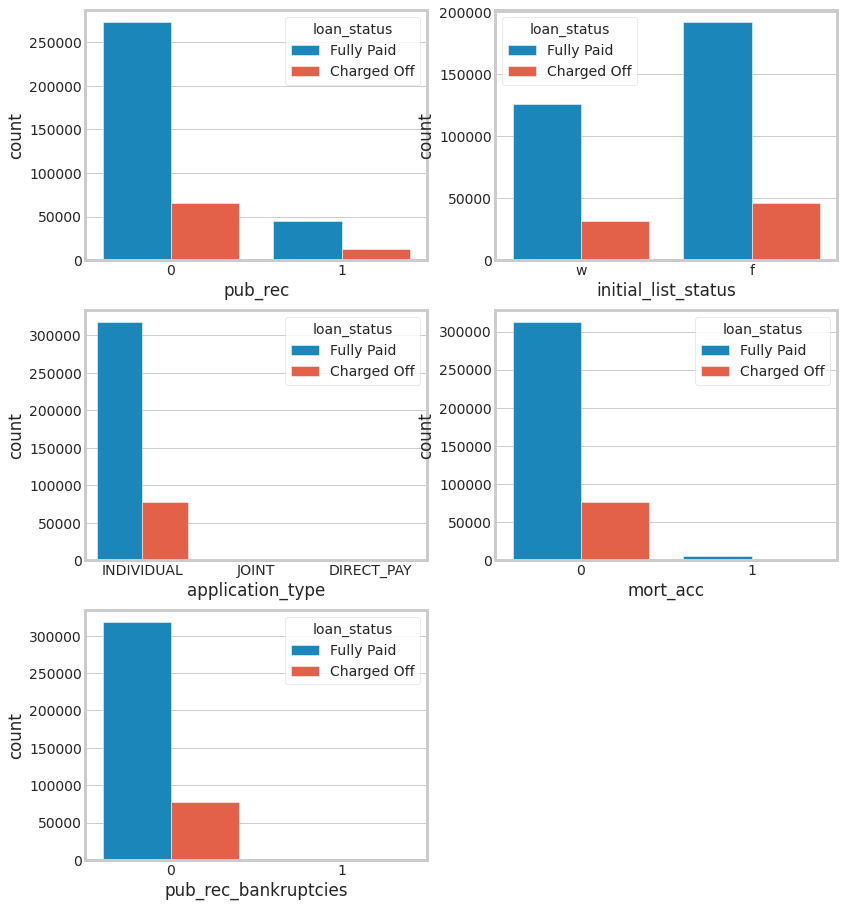

In [ ]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

### target variable과 관계 있는 feature들을 확인

In [ ]:
# correlation 계산을 위해 target variable 변환
data.loan_status = data.loan_status.map({"Fully Paid" : 1, "Charged Off" : 0})

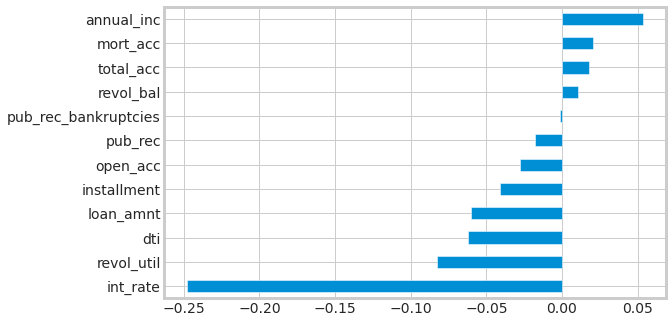

In [ ]:
plt.figure(figsize=(8, 5))
data.corr()['loan_status'].drop('loan_status').sort_values().plot(kind='barh')

## 2. 결측치 처리!

In [ ]:
# The length of the data
data.shape

(396030, 27)

In [ ]:
# column별 결측치 비율 확인
for column in data.columns:
    if data[column].isna().sum() != 0: # 결측치가 존재하면
        missing_values = data[column].isna().sum()
        portion = data[column].isna().mean() * 100 # 결측치 비율 계산.
        print(f"{column} : number of missing values {missing_values} --> {portion:.3f}%")

emp_title : number of missing values 22927 --> 5.789%
emp_length : number of missing values 18301 --> 4.621%
title : number of missing values 1755 --> 0.443%
revol_util : number of missing values 276 --> 0.070%


### 결측치 처리 방법

1. 결측치가 존재하는 column이 분석에 필요한지 체크하여 버릴지 안버릴지 선택

2. 선택을 했다면, 결측치의 비율이 얼마나 많은지 체크하여 버릴지 안버릴지 선택

3. 선택을 했다면, 적당한 값으로 채워줍니다.

> 평균, 합계, 최소값, 최대값, 중앙값, 최빈값 등의 통계량으로 채워줍니다.

> 다른 column값이 겹치는 데이터들을 모아서, 그 데이터들의 통계량으로 채워줍니다.

### `emp_title`

In [ ]:
# emp_title는 분석에 필요할까요? emp_title 자체는 target값 예측에 도움이 되지않는다고 생각. (annual inc 정보가 있어서)
data.drop(columns=["emp_title"], inplace=True)

### `emp_length`

In [ ]:
# emp_length가 target에 영향을 주는지 확인
#data.emp_length.value_counts()
for year in data.emp_length.unique():
    print(f"------- {year} --------")
    print(data.loc[data.emp_length == year, "loan_status"].value_counts(normalize=True))
    print()

------- 10+ years --------
1    0.815814
0    0.184186
Name: loan_status, dtype: float64

------- 4 years --------
1    0.807615
0    0.192385
Name: loan_status, dtype: float64

------- < 1 year --------
1    0.793128
0    0.206872
Name: loan_status, dtype: float64

------- 6 years --------
1    0.810806
0    0.189194
Name: loan_status, dtype: float64

------- 9 years --------
1    0.79953
0    0.20047
Name: loan_status, dtype: float64

------- 2 years --------
1    0.806738
0    0.193262
Name: loan_status, dtype: float64

------- 3 years --------
1    0.804769
0    0.195231
Name: loan_status, dtype: float64

------- 8 years --------
1    0.80024
0    0.19976
Name: loan_status, dtype: float64

------- 7 years --------
1    0.805226
0    0.194774
Name: loan_status, dtype: float64

------- 5 years --------
1    0.807813
0    0.192187
Name: loan_status, dtype: float64

------- 1 year --------
1    0.800865
0    0.199135
Name: loan_status, dtype: float64

------- nan --------
Series([], Na

In [ ]:
# 처리
data.drop(columns=["emp_length"], inplace=True)

### `title`

In [ ]:
# Q. title은 분석에 필요할까요?
data.title.value_counts()

debt consolidation              168108
credit card refinancing          51781
home improvement                 17117
other                            12993
consolidation                     5583
                                 ...  
save                                 1
medical/vacation                     1
my three sons                        1
consolidation to one note            1
first step towards debt free         1
Name: title, Length: 41327, dtype: int64

In [ ]:
# purposed와 title은?
data.purpose.value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [ ]:
# 처리
data.drop(columns=["title"], inplace=True)

### `mort_acc`

In [ ]:
# mort_acc 체크
data.mort_acc.value_counts()

0    389187
1      6843
Name: mort_acc, dtype: int64

In [ ]:
# mort_acc와 관계가 높은 feature 정보를 기준으로 변환하기 위해 상관계수 확인


In [ ]:
# 관계가 높은 total_acc column값을 기준으로 체크
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc

In [ ]:
# 처리

### `revol_util` & `pub_rec_bankruptcies`

In [ ]:
# revol_util과 pub_rec_bankruptcies 결측 비율 확인
#print(data.revol_util.isna().mean() * 100, "%")
data.revol_util.isna().sum()

276

In [ ]:
# 처리
data.dropna(inplace=True) # 결측치가 하나라도 포함되어 있는 row는 삭제.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             395754 non-null  float64       
 1   term                  395754 non-null  object        
 2   int_rate              395754 non-null  float64       
 3   installment           395754 non-null  float64       
 4   grade                 395754 non-null  object        
 5   sub_grade             395754 non-null  object        
 6   home_ownership        395754 non-null  object        
 7   annual_inc            395754 non-null  float64       
 8   verification_status   395754 non-null  object        
 9   issue_d               395754 non-null  datetime64[ns]
 10  loan_status           395754 non-null  int64         
 11  purpose               395754 non-null  object        
 12  dti                   395754 non-null  float64       
 13 

### Categorical feature들 encoding

- categorical feature 종류는 나타내는 정보.

- pandas에서는 일반적으로 문자열 정보로 나타납니다.

- dtype == "object"인 column들이 categorical feature일 가능성이 높습니다!

In [ ]:
# categorical feature들 체크
[column for column in data.columns if data[column].dtypes == object]

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'address']

### `term`

In [ ]:
# term 체크
data.term.value_counts()

 36 months    301782
 60 months     93972
Name: term, dtype: int64

In [ ]:
# 36 months와 60 months 처리
data.term = data.term.map({" 36 months" : 36, " 60 months" : 60})

### `grade`

In [ ]:
# grade와 sub_grade 관계 확인
#print(data.grade.unique())
#print(data.sub_grade.unique())
data.drop(columns=["grade"], inplace=True) # sub_grade가 grade를 대신하기 때문에 지움.

In [ ]:
# one-hot encoding을 한번에 처리해주자!

data = pd.get_dummies(data=data, columns=["sub_grade", "home_ownership", "verification_status",
                                   "purpose", "initial_list_status", "application_type"]) # one-hot encoding
data # 395754 x 78

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36,11.44,329.48,117000.0,2015-01-01,1,26.24,1990-06-01,16.0,0,36369.0,41.8,25.0,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,8000.0,36,11.99,265.68,65000.0,2015-01-01,1,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,0,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,15600.0,36,10.49,506.97,43057.0,2015-01-01,1,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,7200.0,36,6.49,220.65,54000.0,2014-11-01,1,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,24375.0,60,17.27,609.33,55000.0,2013-04-01,0,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,0,0,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,2015-10-01,1,15.63,2004-11-01,6.0,0,1990.0,34.3,23.0,0,0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
396026,21000.0,36,12.29,700.42,110000.0,2015-02-01,1,21.45,2006-02-01,6.0,0,43263.0,95.7,8.0,0,0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
396027,5000.0,36,9.99,161.32,56500.0,2013-10-01,1,17.56,1997-03-01,15.0,0,32704.0,66.9,23.0,0,0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
396028,21000.0,60,15.31,503.02,64000.0,2012-08-01,1,15.88,1990-11-01,9.0,0,15704.0,53.8,20.0,0,0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


### `address`

In [ ]:
# address 확인
data.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [ ]:
# zip code 추출
data.address = data.address.apply(lambda x : x[-5:]) # 각 데이터마다 뒤에 5개만 잘라서 사용 (zipcode)

In [ ]:
# 처리
data.address.value_counts()

70466    56943
30723    56496
22690    56494
48052    55884
00813    45793
29597    45455
05113    45363
11650    11217
93700    11137
86630    10972
Name: address, dtype: int64

In [ ]:
data = pd.get_dummies(data, columns=["address"])
data

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,...,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,address_00813,address_05113,address_11650,address_22690,address_29597,address_30723,address_48052,address_70466,address_86630,address_93700
0,10000.0,36,11.44,329.48,117000.0,2015-01-01,1,26.24,1990-06-01,16.0,0,36369.0,41.8,25.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,2015-01-01,1,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,2015-01-01,1,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2014-11-01,1,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,2013-04-01,0,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,2015-10-01,1,15.63,2004-11-01,6.0,0,1990.0,34.3,23.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,2015-02-01,1,21.45,2006-02-01,6.0,0,43263.0,95.7,8.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,2013-10-01,1,17.56,1997-03-01,15.0,0,32704.0,66.9,23.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,2012-08-01,1,15.88,1990-11-01,9.0,0,15704.0,53.8,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 87 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            395754 non-null  float64       
 1   term                                 395754 non-null  int64         
 2   int_rate                             395754 non-null  float64       
 3   installment                          395754 non-null  float64       
 4   annual_inc                           395754 non-null  float64       
 5   issue_d                              395754 non-null  datetime64[ns]
 6   loan_status                          395754 non-null  int64         
 7   dti                                  395754 non-null  float64       
 8   earliest_cr_line                     395754 non-null  datetime64[ns]
 9   open_acc                             395754 non-null  float64       
 

### `issue_d` 

In [ ]:
# Q. issue_d는 분석에 필요할까요?
data.drop(columns=["issue_d"], inplace=True)

### `earliest_cr_line`

In [ ]:
# earliest_cr_line 체크
data.earliest_cr_line.value_counts()

2000-10-01    3015
2000-08-01    2934
2001-10-01    2895
2001-08-01    2883
2000-11-01    2734
              ... 
1957-09-01       1
1959-06-01       1
1957-02-01       1
1958-07-01       1
1959-11-01       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [ ]:
# 처리
data.drop(columns=["earliest_cr_line"], inplace=True)

### `sub_grade`, `verification_status`, `purpose`, `initial_list_status`, `application_type`, `home_ownership`, `zip-code`

In [ ]:
# one-hot encoding
data.shape

(395754, 85)

### 전처리 완료된 데이터 저장

In [ ]:
base_path

'/content/drive/MyDrive/Colab Notebooks/data/Lending Club Loan Prediction/'

In [ ]:
# 전처리가 완료된 data를 저장합니다.
data.to_csv(base_path + "result.csv", index=False)

## Let's Training

In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns=["loan_status"]) # target 빼고 나머지.
y = data.loan_status # target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y) # target(y)의 비율 8:2에 맞춰서 데이터를 나눕니다.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296815, 84) (98939, 84) (296815,) (98939,)


In [ ]:
# AUC(Area Under Curve) : ROC curve 아래 넓이. 1 == 다맞은 경우. // 0.5 == 망한 경우.
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(n_estimators=100, max_depth=8)
clf.fit(X_train, y_train)
pred = clf.predict(X_train) # 0, 1, 0, ...
probs = clf.predict_proba(X_train)[:, 1]
print("Training ROC-AUC Score : %.4f" % roc_auc_score(y_train, probs))

Training ROC-AUC Score : 0.8996


In [ ]:
# test 데이터에 대해서 평가.
pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)[:, 1]
print("ROC-AUC Score : %.4f" % roc_auc_score(y_test, probs))

ROC-AUC Score : 0.8969


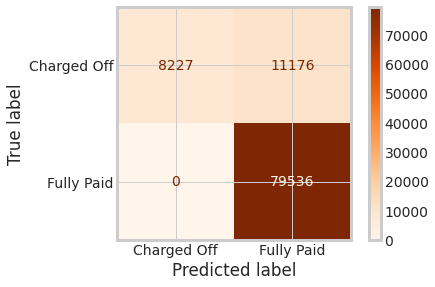

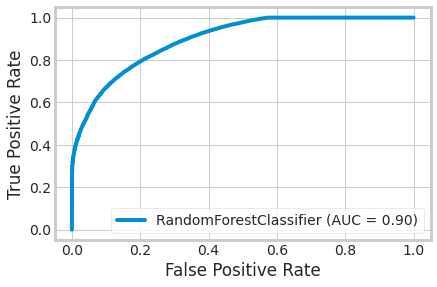

In [ ]:
# 결과를 그래프로 출력.
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

plot_confusion_matrix(clf, X_test, y_test, cmap="Oranges", values_format='d',
                      display_labels=["Charged Off", "Fully Paid"])
plot_roc_curve(clf, X_test, y_test)

In [ ]:
# xgboost를 개선한 모델을 lightgbm 이라고 한다.